In [1]:
import pyclesperanto_prototype as cle

cle.select_device('RTX')

cle.set_wait_for_kernel_finish(True)

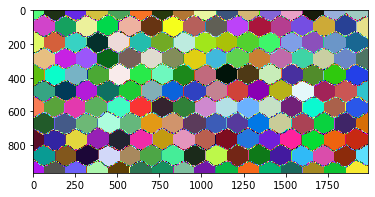

In [2]:
labels = cle.artificial_tissue_2d(width=2048, height=1024, delta_x=128, delta_y=96)
cle.imshow(labels, labels=True)

# 2D Measurements using clEsperanto

In [3]:
import time

for i in range(0, 10):
    start_time = time.time()
    
    # get dictionary of measurements
    stats = cle.statistics_of_labelled_pixels(None, labels, use_gpu=True)

    # read out arrays of values
    area = stats['area']
    mean = stats['mean_intensity']
    std_dev = stats['standard_deviation_intensity']
    centroids = stats['centroid']
    
    print("Determining label statistics using clEsperanto took " + str(time.time() - start_time) + " s")

Determining label statistics using clEsperanto took 0.10530805587768555 s
Determining label statistics using clEsperanto took 0.03941512107849121 s
Determining label statistics using clEsperanto took 0.036041975021362305 s
Determining label statistics using clEsperanto took 0.036058902740478516 s
Determining label statistics using clEsperanto took 0.03565669059753418 s
Determining label statistics using clEsperanto took 0.03788614273071289 s
Determining label statistics using clEsperanto took 0.04550981521606445 s
Determining label statistics using clEsperanto took 0.03549027442932129 s
Determining label statistics using clEsperanto took 0.03528428077697754 s
Determining label statistics using clEsperanto took 0.034827470779418945 s


# 2D Measurements using scikit-image

In [4]:
from skimage.measure import regionprops
import numpy as np

np_labels = cle.pull_zyx(labels).astype(int)

def standard_deviation_intensity(region, intensities):
    return np.std(intensities[region])

extra_properties = [standard_deviation_intensity]

for i in range(0, 10):
    start_time = time.time()
        
    # get regionprops
    stats = regionprops(np_labels, np_labels, cache=True, extra_properties=extra_properties)

    # read out arrays of values
    area = [s.area for s in stats]
    mean = [s.mean_intensity for s in stats]
    std_dev = [s.standard_deviation_intensity for s in stats]
    centroids = [s.centroid for s in stats]
    
    print("Determining label statistics using scikit-image took " + str(time.time() - start_time) + " s")

Determining label statistics using scikit-image took 0.0688173770904541 s
Determining label statistics using scikit-image took 0.0688169002532959 s
Determining label statistics using scikit-image took 0.06379365921020508 s
Determining label statistics using scikit-image took 0.061834096908569336 s
Determining label statistics using scikit-image took 0.06685972213745117 s
Determining label statistics using scikit-image took 0.0608367919921875 s
Determining label statistics using scikit-image took 0.060837745666503906 s
Determining label statistics using scikit-image took 0.060829877853393555 s
Determining label statistics using scikit-image took 0.07081484794616699 s
Determining label statistics using scikit-image took 0.06180119514465332 s


# 3D Measurements

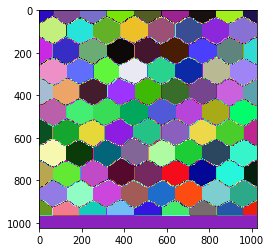

In [5]:
stack = cle.create([128, 1024, 1024])

for z in range(0, 128):
    cle.copy_slice(labels, stack, z)

cle.imshow(stack, labels=True)

# 3D Measurements using clEsperanto

In [6]:
for i in range(0, 10):
    start_time = time.time()
    
    # get dictionary of measurements
    stats = cle.statistics_of_labelled_pixels(None, stack, use_gpu=True)

    # read out arrays of values
    area = stats['area']
    mean = stats['mean_intensity']
    std_dev = stats['standard_deviation_intensity']
    centroids = stats['centroid']
    
    print("Determining label statistics using clEsperanto took " + str(time.time() - start_time) + " s")

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:242: RuntimeWarning: overflow encountered in subtract
  bbox_max_z - bbox_min_z + 1,
c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:243: RuntimeWarning: overflow encountered in subtract
  bbox_max_y - bbox_min_y + 1,
c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:244: RuntimeWarning: overflow encountered in subtract
  bbox_max_x - bbox_min_x + 1,
c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:246: RuntimeWarning: overflow encountered in subtract
  region_props['bbox_width'] = bbox_max_x - bbox_min_x + 1
c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:247: RuntimeWarning: overflow encountered in subtract
  region_props['bbox_height'] = bbox_max_y 

Determining label statistics using clEsperanto took 0.5113863945007324 s
Determining label statistics using clEsperanto took 0.4570596218109131 s
Determining label statistics using clEsperanto took 0.45224738121032715 s
Determining label statistics using clEsperanto took 0.44876694679260254 s
Determining label statistics using clEsperanto took 0.45870471000671387 s
Determining label statistics using clEsperanto took 0.45364952087402344 s
Determining label statistics using clEsperanto took 0.45061707496643066 s
Determining label statistics using clEsperanto took 0.4549705982208252 s
Determining label statistics using clEsperanto took 0.4495961666107178 s
Determining label statistics using clEsperanto took 0.46587300300598145 s


# 3D Measurements using scikit-image

In [7]:
from skimage.measure import regionprops
import numpy as np

np_labels = cle.pull_zyx(stack).astype(int)

def standard_deviation_intensity(region, intensities):
    return np.std(intensities[region])

extra_properties = [standard_deviation_intensity]

for i in range(0, 10):
    start_time = time.time()
    
    # get regionprops
    stats = regionprops(np_labels, np_labels, cache=True, extra_properties=extra_properties)

    # read out arrays of values
    area = [s.area for s in stats]
    mean = [s.mean_intensity for s in stats]
    std_dev = [s.standard_deviation_intensity for s in stats]
    centroids = [s.centroid for s in stats]
    
    print("Determining label statistics using scikit-image took " + str(time.time() - start_time) + " s")

Determining label statistics using scikit-image took 6.769770860671997 s
Determining label statistics using scikit-image took 6.826043367385864 s
Determining label statistics using scikit-image took 6.702510833740234 s
Determining label statistics using scikit-image took 6.830817222595215 s
Determining label statistics using scikit-image took 6.872242212295532 s
Determining label statistics using scikit-image took 6.9041221141815186 s
Determining label statistics using scikit-image took 6.912805080413818 s
Determining label statistics using scikit-image took 7.4404296875 s
Determining label statistics using scikit-image took 7.018818616867065 s
Determining label statistics using scikit-image took 7.065474987030029 s
